In [1]:
from mnist_datasets import MNISTDatasets
from mnist_digit_recog import MNISTDigitRecog
import matplotlib.pyplot as plt
%matplotlib inline

#--- displays the 28x28 image and one-hot-encoded representation of a handwritten digit
def display_digit(digit, categories):
    plt.title('Image (28x28) \nLabel({}) {}'.format(categories.argmax(), categories))
    plt.imshow(digit, cmap='gray_r')
    plt.show()
    
    return

#--- picks a random digit to display
def display_random_digit(mn):
    digit, categories = mn.get_random_digit()
    display_digit(digit, categories)
    
    return

#--- plot accuracy of neural network training
def plot_training_history(accuracies):
    _, ax = plt.subplots()
    ax.set(xlabel='epoch', ylabel='accuracy', title='Training History')
    ax.plot([i for i in range(len(accuracies))], accuracies)
    plt.show()
    
    return


W0805 15:32:13.339637 15096 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\digit_recog\lib\site-packages\tflearn\helpers\summarizer.py:9: The name tf.summary.merge is deprecated. Please use tf.compat.v1.summary.merge instead.

W0805 15:32:13.341632 15096 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\digit_recog\lib\site-packages\tflearn\helpers\trainer.py:25: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

W0805 15:32:13.348615 15096 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\digit_recog\lib\site-packages\tflearn\collections.py:13: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0805 15:32:13.353600 15096 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\digit_recog\lib\site-packages\tflearn\config.py:123: The name tf.get_collection is deprecated. Please use tf.compat.v1.get_collection instead.

W0805 15:32:13.358588 15096 deprecation_wr

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
#--- create the object, mn, that contains the MNIST training and testing datasets
mn = MNISTDatasets()

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


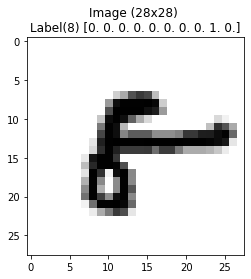

In [3]:
#--- display a random digit to view 
display_random_digit (mn)

In [4]:
#--- create the neural network, dr, that will learn to recognize the handwritten digits from mn
dr = MNISTDigitRecog(mn)

W0805 15:32:25.000458 15096 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\digit_recog\lib\site-packages\tflearn\layers\core.py:81: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 15:32:25.002454 15096 deprecation.py:506] From C:\ProgramData\Anaconda3\envs\digit_recog\lib\site-packages\tflearn\initializations.py:174: calling TruncatedNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0805 15:32:25.033370 15096 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\digit_recog\lib\site-packages\tflearn\optimizers.py:135: The name tf.train.GradientDescentOptimizer is deprecated. Please use tf.compat.v1.train.GradientDescentOptimizer instead.

W0805 15:32:25.037360 15096 deprecation.py:506] From C:\ProgramData\Anaconda3\envs\digit_recog\l

In [5]:
#--- train the neural network
dr.train(n_epoch=100)

Training Step: 49499  | total loss: 0.06476 | time: 0.993s
| SGD | epoch: 100 | loss: 0.06476 - acc: 0.9835 -- iter: 49400/49500
Training Step: 49500  | total loss: 0.06304 | time: 2.002s
| SGD | epoch: 100 | loss: 0.06304 - acc: 0.9842 | val_loss: 0.10343 - val_acc: 0.9682 -- iter: 49500/49500
--


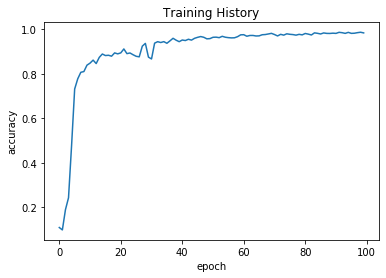

In [6]:
#--- view the training history to examine how the neural network's recognition accuracy increases over each epoch
plot_training_history(dr.accuracies)

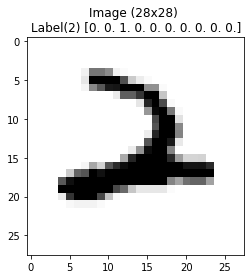

The neural network thinks the image above lookes like the number 2.
The neural network identified the image CORRECTLY!



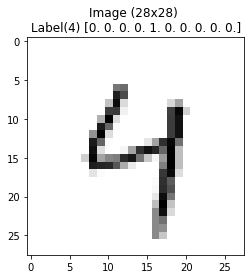

The neural network thinks the image above lookes like the number 4.
The neural network identified the image CORRECTLY!



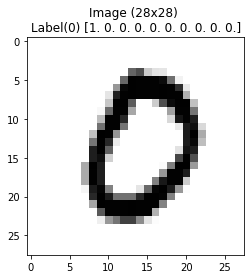

The neural network thinks the image above lookes like the number 0.
The neural network identified the image CORRECTLY!



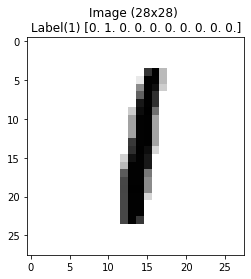

The neural network thinks the image above lookes like the number 1.
The neural network identified the image CORRECTLY!



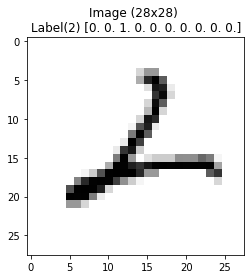

The neural network thinks the image above lookes like the number 2.
The neural network identified the image CORRECTLY!



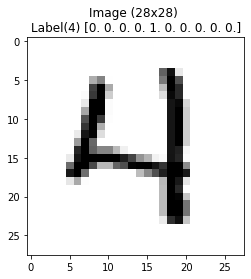

The neural network thinks the image above lookes like the number 4.
The neural network identified the image CORRECTLY!



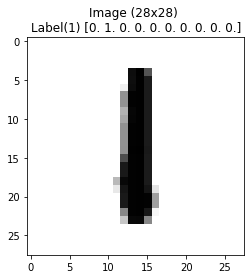

The neural network thinks the image above lookes like the number 1.
The neural network identified the image CORRECTLY!



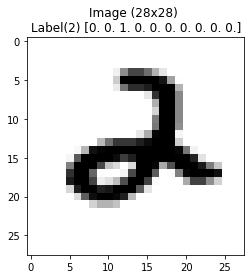

The neural network thinks the image above lookes like the number 2.
The neural network identified the image CORRECTLY!



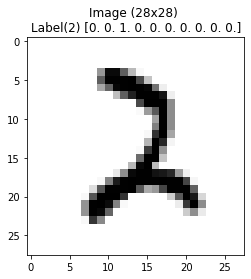

The neural network thinks the image above lookes like the number 2.
The neural network identified the image CORRECTLY!



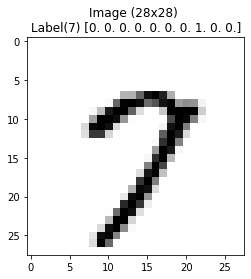

The neural network thinks the image above lookes like the number 7.
The neural network identified the image CORRECTLY!



In [7]:
#--- give random handwritten digits from the testing dataset from the neural network to identify

for _ in range(10):
    digit, categories = mn.get_random_digit([mn.testing_images])
    display_digit(digit, categories)
    
    #--- try to identify the digit
    number = dr.identify(digit)
    print ("The neural network thinks the image above lookes like the number {}.".format(number))
    if number == categories.argmax():
        print ("The neural network identified the image CORRECTLY!")
    else:
        print ("The neural network was WRONG for this image!")
    print ("")
